
# Image Filtering, Convolution and Hybrid images

The primary objective of this lab is to introduce you to the concepts of image convolution and padding in image processing through hands-on experiments. By the end of this lab, students should be able to:

- Understand 2D Convolution: Learn how convolution works by manually applying a filter (kernel) over an image and computing the dot product for each region.
- Explore Padding: Understand how padding prevents the shrinking of images during convolution and experiment with different types of padding.
- Visualize the Convolution Process: Through visual demonstrations, observe how a filter (kernel) slides across an image, affecting the pixel values to generate a processed output.
- Implement Convolution in NumPy: Gain practical experience implementing a convolution function from scratch in Python using NumPy.
- See the Impact of Different Filters: Apply different filters (e.g., edge detection, sharpening) to see how they modify the image.
- Build Hybrid Images: Students can explore how low-pass and high-pass filters are used to combine two images into a hybrid image.

By engaging in these activities, you will develop both a conceptual and practical understanding of the fundamentals of convolution and its significance in image processing tasks such as filtering, edge detection, and feature extraction.

Reference:[ Visualization of Filters and convoulation](https://medium.com/@Tms43/understanding-padding-strides-in-convolutional-neural-networks-cnn-for-effective-image-feature-1b0756a52918)

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# **PART 1:** Convolution and padding

1. Convolution in 2D:

  Convolution in 2D is the process of applying a filter (or kernel) to an image by sliding the filter over the image and computing the dot product between the filter and overlapping values in the image.
  Mathematical Explanation:

  Given an image I(x,y) and a filter F(a,b), the 2D convolution operation at pixel I(i,j) is defined as:
    
      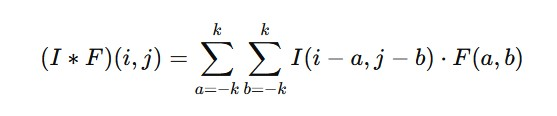


  where k is half the size of the filter.
  
  Code Example for 2D Convolution:

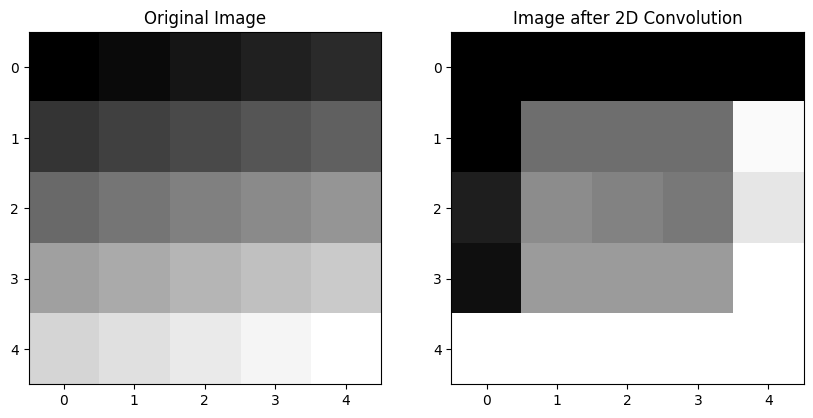

In [ ]:
# Create a simple 5x5 matrix as an image
img = np.array([[10, 20, 30, 40, 50],
                [60, 70, 80, 90, 100],
                [110, 120, 130, 140, 150],
                [160, 170, 180, 190, 200],
                [210, 220, 230, 240, 250]], dtype=np.uint8)

def apply_convolution(img, kernel):
    """Apply 2D convolution using a simple kernel."""
    return cv2.filter2D(img, -1, kernel)  #parameters: image, ddepth/data type (The depth of an image refers to the number of bits used to represent each pixel (e.g., 8-bit, 16-bit), -1 means if image is of 8 bit, then the output will also be the same), kernel

# Define a simple 3x3 kernel (e.g., sharpening kernel)
kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])

# Apply the convolution
convolved_img = apply_convolution(img, kernel)

convolved_img = apply_convolution(convolved_img, kernel)

# Plot the original and convolved images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(img, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Image after 2D Convolution")
plt.imshow(convolved_img, cmap='gray')
plt.show()


2. Padding:

  Padding is the process of adding extra pixels around the image before applying convolution to maintain or control the size of the output image. There are two main types of padding often discussed: valid (no padding) and same (padding to keep the image size unchanged).


  Reference for Valid vs Same padding:
  1. https://wandb.ai/krishamehta/seo/reports/Difference-Between-SAME-and-VALID-Padding-in-TensorFlow--VmlldzoxODkwMzE
  2. https://numpy.org/doc/stable/reference/generated/numpy.pad.html



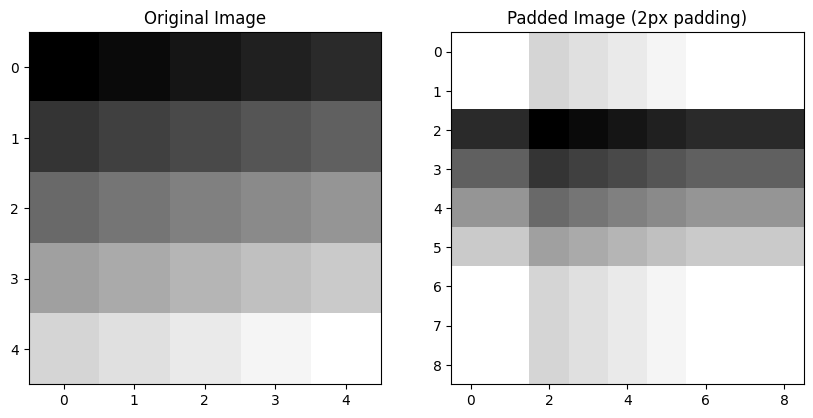

In [ ]:
# Create a simple 5x5 matrix as an image
img = np.array([[10, 20, 30, 40, 50],
                [60, 70, 80, 90, 100],
                [110, 120, 130, 140, 150],
                [160, 170, 180, 190, 200],
                [210, 220, 230, 240, 250]], dtype=np.uint8)

# Pad the image
#padded_img = np.pad(img, pad_width=2, mode='constant', constant_values=0)  #zero padding: pads the input with 0 on all sides
#padded_img = np.pad(img, pad_width=2, mode='edge')       # edge padding: pads with the value in the edge of the image
padded_img = np.pad(img, pad_width=2, mode='maximum')  # max padding:pads the input array with the maximum value of the input array


# Plot both the original and padded images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(img, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Padded Image (2px padding)")
plt.imshow(padded_img, cmap='gray')
plt.show()

3. Visualizing the Sliding of the Kernel:

  It is also helpful to visually demonstrate how the kernel slides over the image during convolution. You can use NumPy to manually perform convolution and visualize each step.


  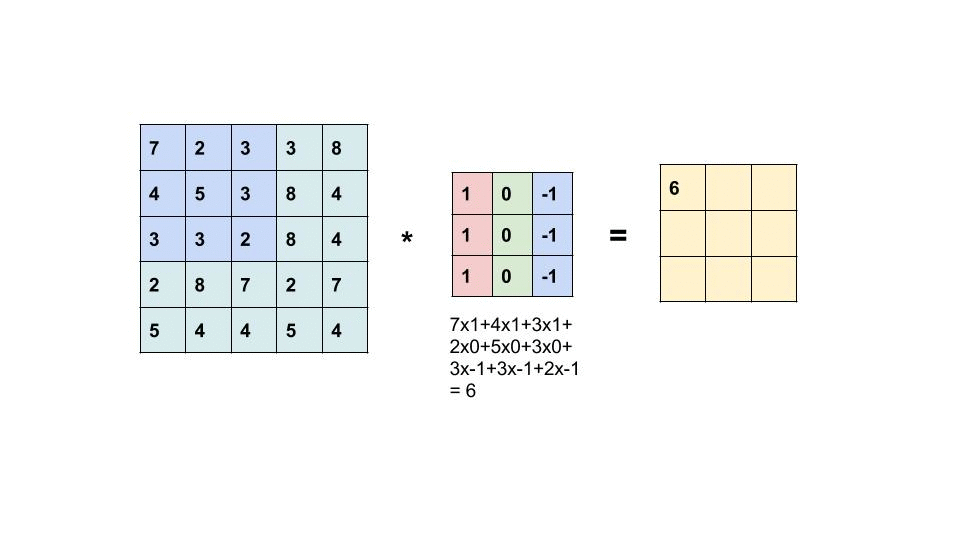

4. Visual Explanation of Padding and Convolution:

 This is a visual explanation of the effect of different padding and stride settings. No padding will shrink the output image, while same padding retains the image size. Additionally, you can visualize how the output changes by varying the stride.

 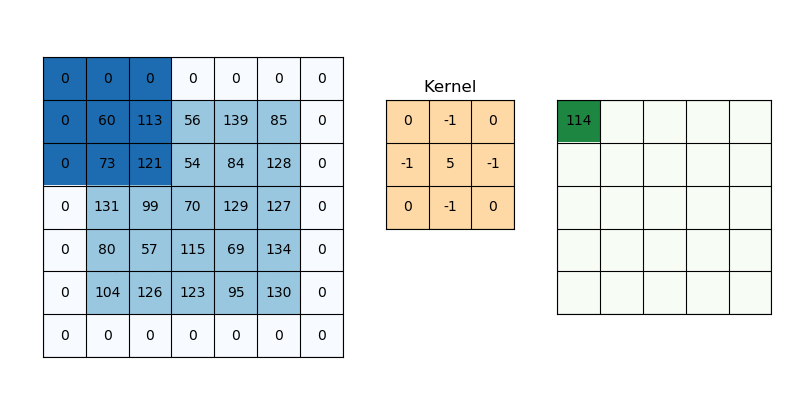

# **PART 2** : Implementing Filters

Filters are used for-
  - Smoothing and Blurring
      
      Gaussian Blur: Applies a weighted average based on a Gaussian function.
      
      Box/Average Filter: Simple mean filter that smooths the image.
  - Noise Reduction

      Gaussian Filter: Reduces noise while preserving edges.
      
      Median Filter: Effective for removing salt-and-pepper noise.
  - Edge Detection

      Sobel Filter: Detects edges by calculating the gradient.
  
      Laplacian Filter: Uses second derivatives to find edges.
  - Image Enhancement
      Histogram Equalization: Enhances contrast by spreading out intensity values.

1. Average Filter

  The Average filter (or box filter) smooths an image by averaging the pixel values within a square kernel centered on each pixel. The formula for each pixel value after applying an average filter is:

  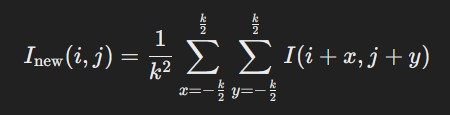
  
  where:

      - I(i,j) is the original intensity of the pixel at location (i,j),
      - k is the size of the kernel (e.g., 3×3, 5×5, etc.),
      I_new(i,j) is the resulting intensity of the pixel after averaging.

  Each pixel in the image is replaced by the average of its neighboring pixel values within the k×k window.

In [ ]:

# Load a clear image
image_path = './img1.jpg'  # Update with your image path
clear_image = cv2.imread(image_path, cv2.IMREAD_COLOR)
clear_image = cv2.cvtColor(clear_image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB

# Apply Average filter
filtered_image = cv2.blur(clear_image, (5, 5))  # (5, 5) is the kernel size

(np.float64(-0.5), np.float64(286.5), np.float64(252.5), np.float64(-0.5))

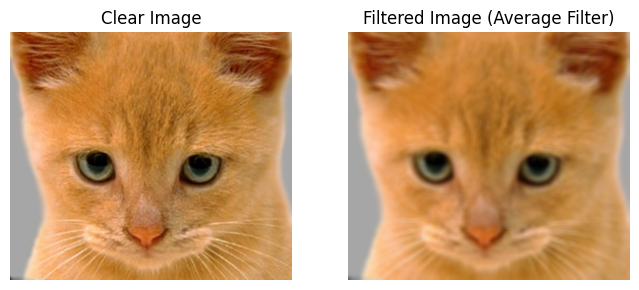

In [ ]:

# Plotting the images
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(clear_image)
plt.title('Clear Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(filtered_image)
plt.title('Filtered Image (Average Filter)')
plt.axis('off')


  Average Filter with Convolution

In [ ]:

# Load a clear image
image_path = './img1.jpg'  # Update with your image path
clear_image = cv2.imread(image_path, cv2.IMREAD_COLOR)
clear_image = cv2.cvtColor(clear_image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB

# Define the Average Filter kernel (5x5)
kernel = np.ones((5, 5), np.float32) / 25  # Normalize to make it an average filter

# Apply convolution multiple times
first_convolution = cv2.filter2D(clear_image, -1, kernel)  # First convolution
second_convolution = cv2.filter2D(first_convolution, -1, kernel)  # Second convolution
third_convolution = cv2.filter2D(second_convolution, -1, kernel)  # Third convolution

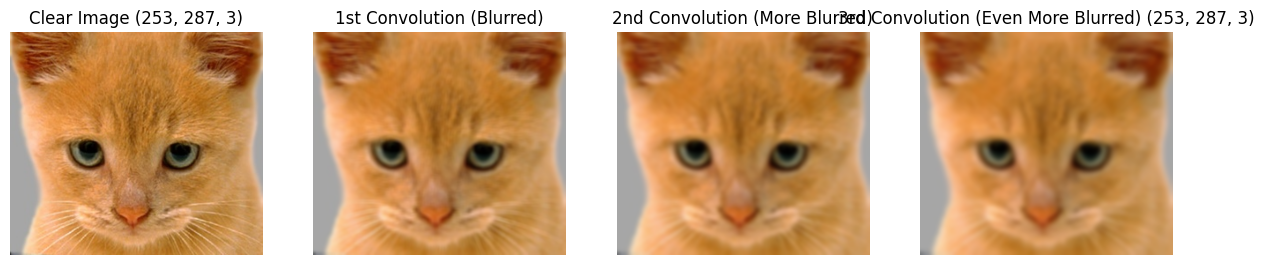

In [ ]:

# Plotting the images
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.imshow(clear_image)
plt.title(f'Clear Image {clear_image.shape}')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(first_convolution)
plt.title('1st Convolution (Blurred)')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(second_convolution)
plt.title('2nd Convolution (More Blurred)')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(third_convolution)
plt.title(f'3rd Convolution (Even More Blurred) {third_convolution.shape}')
plt.axis('off')

plt.show()

2. Gaussian Filter

  The Gaussian filter smooths an image by applying a Gaussian function as a weighted average around each pixel. The formula for the Gaussian function in 2D is:

  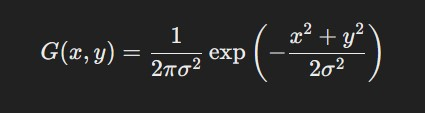

  where:

    - (x,y) are the coordinates of a pixel relative to the center of the kernel,

    - σ is the standard deviation, which controls the spread of the Gaussian function.

  The Gaussian filter kernel is applied across the image by convolving it with the pixel values, where larger values of σσ result in more blurring.


In [ ]:
# Function to add Gaussian noise to an image
def add_gaussian_noise(image, mean=0, sigma=25):
    noisy_image = image + np.random.normal(mean, sigma, image.shape).astype(np.uint8)
    return noisy_image


In [ ]:
# Load a clear image
image_path = './img1.jpg'  # Update with your image path
clear_image = cv2.imread(image_path, cv2.IMREAD_COLOR)
clear_image = cv2.cvtColor(clear_image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB

# Add Gaussian noise
noisy_image = add_gaussian_noise(clear_image)

# Apply Gaussian filter
filtered_image = cv2.GaussianBlur(noisy_image, (5, 5), sigmaX=0)


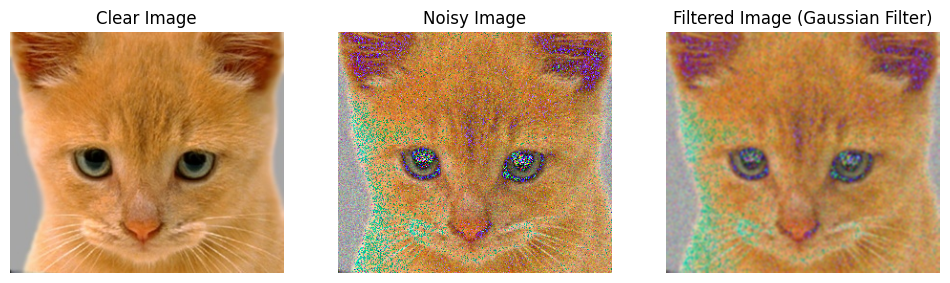

In [ ]:
# Plotting the images
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(clear_image)
plt.title('Clear Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(noisy_image)
plt.title('Noisy Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(filtered_image)
plt.title('Filtered Image (Gaussian Filter)')
plt.axis('off')

plt.show()

3. Laplacian Filter

  Laplacian Filter: The Laplacian filter highlights areas where pixel intensity changes rapidly, which makes it effective for detecting edges. Since edges are typically points of high contrast, the Laplacian filter captures these variations.
  
  Grayscale Conversion: Edge detection is often done on grayscale images for simplicity and efficiency, so we load the image in grayscale.
  
  Negative Values: The Laplacian function can produce negative values, which are then converted to absolute values to properly display the resulting image.

  The Laplacian operator in 2D is defined as:
  
  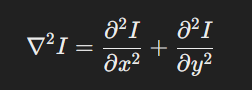

In [ ]:
image_path = './img1.jpg'  # Update with your image path
clear_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale for edge detection

# Apply Laplacian filter
laplacian_filtered_image = cv2.Laplacian(clear_image, cv2.CV_64F)  # Use 64F to handle negative values
laplacian_filtered_image = cv2.convertScaleAbs(laplacian_filtered_image)  # Convert back to 8-bit

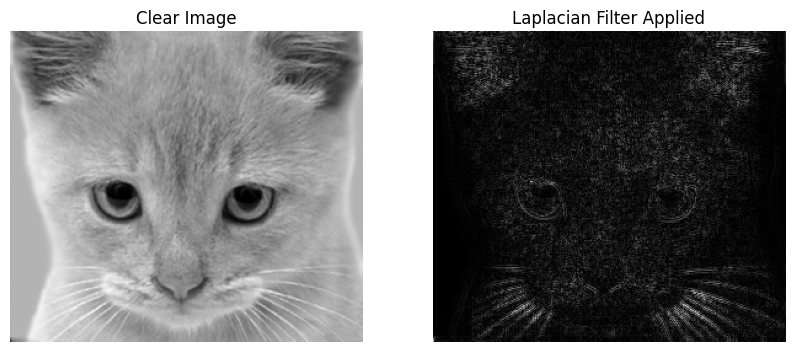

In [ ]:

# Plotting the images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(clear_image, cmap='gray')
plt.title('Clear Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(laplacian_filtered_image, cmap='gray')
plt.title('Laplacian Filter Applied')
plt.axis('off')

plt.show()

Do it yourself!



In [ ]:

# Load the image in grayscale
image_path = './img1.jpg'  # Update with your image path
clear_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# # Define a Laplacian kernel (3x3)
# laplacian_kernel = np.array([[0, -1, 0],
#                              [-1, 4, -1],
#                              [0, -1, 0]], dtype=np.float32)

# Apply the Laplacian filter multiple times

# Apply Laplacian filter
first_convolution = cv2.Laplacian(clear_image, cv2.CV_64F)
first_convolution =  cv2.convertScaleAbs(first_convolution)

second_convolution =  cv2.Laplacian(first_convolution, cv2.CV_64F)
second_convolution = cv2.convertScaleAbs(second_convolution)

third_convolution = cv2.Laplacian(second_convolution, cv2.CV_64F)
third_convolution = cv2.convertScaleAbs(third_convolution)

# Convert to 8-bit for display (if necessary)
# first_convolution =
# second_convolution =
# third_convolution =

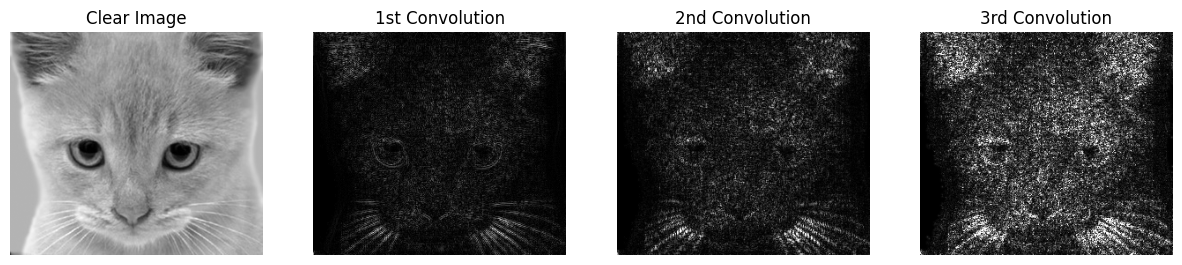

In [ ]:
# Plotting the images
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.imshow(clear_image, cmap='gray')
plt.title(f'Clear Image')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(first_convolution, cmap='gray')
plt.title('1st Convolution')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(second_convolution, cmap='gray')
plt.title('2nd Convolution')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(third_convolution, cmap='gray')
plt.title(f'3rd Convolution')
plt.axis('off')

plt.show()

4. Histogram Equalization:

  Histogram Equalization: This technique spreads out the intensity values of pixels in the image to utilize the full range of possible intensities. This makes dark areas darker and bright areas brighter, enhancing overall contrast.
    
  Grayscale Conversion: Histogram equalization works on grayscale images, as it involves manipulating intensity values directly.

  Histogram Equalization redistributes the intensity values of an image to enhance its contrast by equalizing the cumulative distribution of pixel intensities. For an image with intensity levels 0,1,...,L−1 the formula for the transformation function T(r) applied to each pixel intensity r is:

  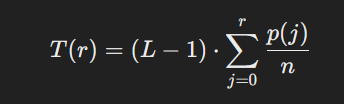
    
  where:

  - r is the original pixel intensity,
  - L is the number of intensity levels (typically 256 for an 8-bit image),
  - p(j) is the histogram count (frequency) for intensity j,
  - n is the total number of pixels in the image.

  Histogram equalization adjusts the pixel intensities so that they are more uniformly distributed across the intensity spectrum, increasing the overall contrast in the image.


In [ ]:
image_path = './img1.jpg'  # Update with your image path
clear_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)   # Convert from BGR to RGB

# Apply Histogram Equalization
equalized_image = cv2.equalizeHist(clear_image)

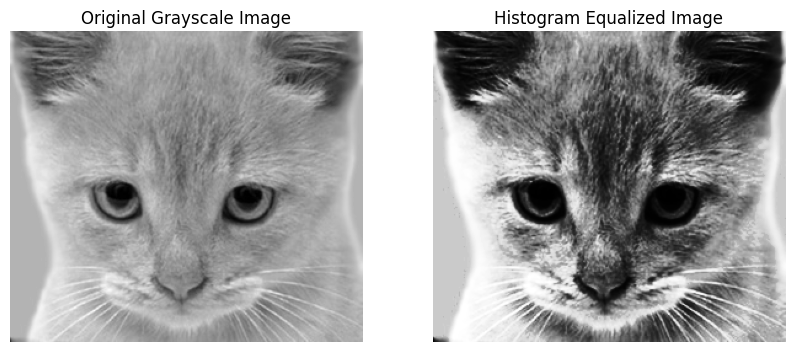

In [ ]:

# Plotting the images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(clear_image, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Histogram Equalized Image')
plt.axis('off')

plt.show()

Do it yourself!


In [ ]:
# Load the image in grayscale
image_path = './img1.jpg'  # Update with your image path
clear_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply Histogram Equalization multiple times
# first_equalization =
# second_equalization =
# third_equalization =

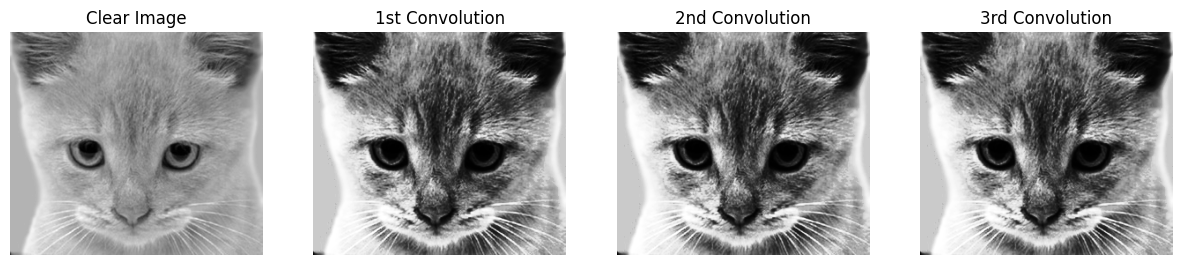

In [ ]:
# Plotting the images
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.imshow(clear_image, cmap='gray')
plt.title(f'Clear Image')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(first_equalization, cmap='gray')
plt.title('1st Convolution')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(second_equalization, cmap='gray')
plt.title('2nd Convolution')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(third_equalization, cmap='gray')
plt.title(f'3rd Convolution')
plt.axis('off')

plt.show()

# **Part 3:** Pooling

Pooling, also known as subsampling or downsampling, is a technique used in CNNs to reduce the spatial dimensions of feature maps while retaining essential information. It helps in controlling the model’s complexity, reducing overfitting, and improving computational efficiency by reducing the number of parameters and computation required in subsequent layers.

1. Max Pooling



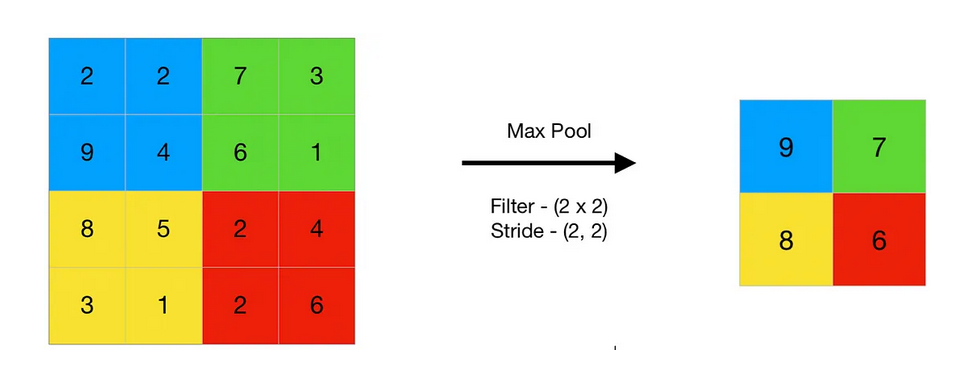

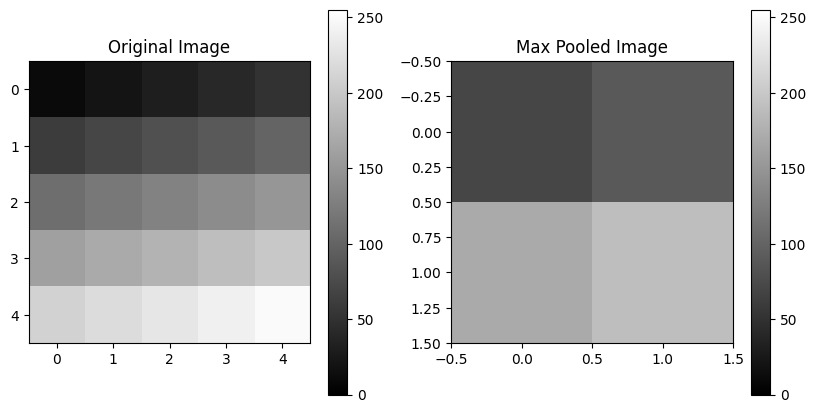

Original Image:
 [[ 10  20  30  40  50]
 [ 60  70  80  90 100]
 [110 120 130 140 150]
 [160 170 180 190 200]
 [210 220 230 240 250]]
Max Pooled Image:
 [[ 70  90]
 [170 190]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def max_pooling(img, pool_size):
    """Apply max pooling to a grayscale image."""
    h, w = img.shape # (4,4)
    ph, pw = pool_size # (2,2)
    pooled_h, pooled_w = h // ph, w // pw  # Calculate the output size, (4//2, 4//2) (2,2)

    pooled_img = np.zeros((pooled_h, pooled_w), dtype=np.uint8)

    for i in range(pooled_h):
        for j in range(pooled_w):
            pooled_img[i, j] = np.max(img[i * ph: (i + 1) * ph, j * pw: (j + 1) * pw])

    return pooled_img

# Create a simple 5x5 matrix as an image
img = np.array([[10,  20,  30,  40,  50],
                [60,  70,  80,  90, 100],
                [110, 120, 130, 140, 150],
                [160, 170, 180, 190, 200],
                [210, 220, 230, 240, 250]], dtype=np.uint8)

# Define pooling window size (e.g., 2x2)
pool_size = (2, 2)

# Apply max pooling
pooled_img = max_pooling(img, pool_size)

# Plot the original and pooled images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.colorbar()

plt.subplot(1, 2, 2)
plt.title("Max Pooled Image")
plt.imshow(pooled_img, cmap='gray', vmin=0, vmax=255)
plt.colorbar()

plt.show()

# Print the pooled image for reference
print("Original Image:\n", img)
print("Max Pooled Image:\n", pooled_img)


2. Average Pooling

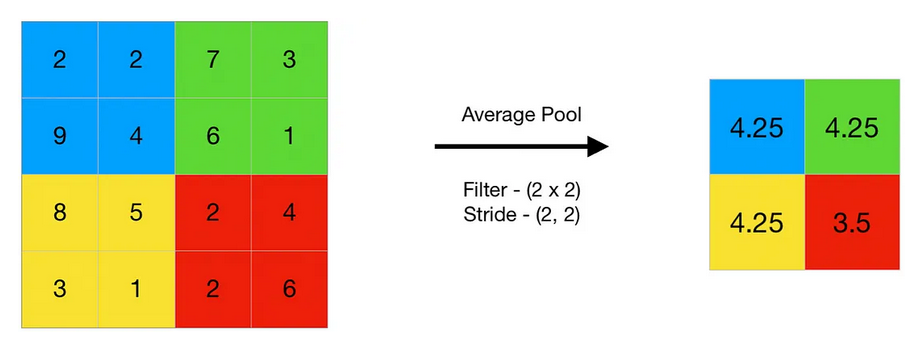

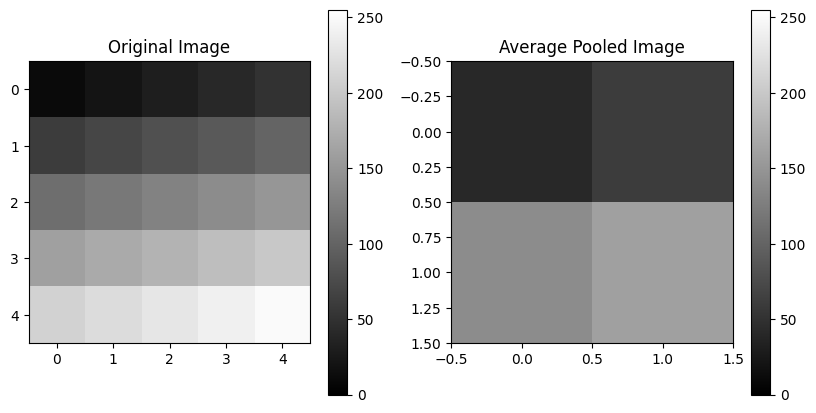

Original Image:
 [[ 10  20  30  40  50]
 [ 60  70  80  90 100]
 [110 120 130 140 150]
 [160 170 180 190 200]
 [210 220 230 240 250]]
Average Pooled Image:
 [[ 40  60]
 [140 160]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


#https://miro.medium.com/v2/resize:fit:1400/1*sq6uZmuFiQGcXVZFcZK1vg.png

def average_pooling(img, pool_size):
    """Apply average pooling to a grayscale image."""
    h, w = img.shape
    ph, pw = pool_size
    pooled_h, pooled_w = h // ph, w // pw  # Calculate the output size

    pooled_img = np.zeros((pooled_h, pooled_w), dtype=np.uint8)

    for i in range(pooled_h):
        for j in range(pooled_w):
            pooled_img[i, j] = np.mean(img[i * ph: (i + 1) * ph, j * pw: (j + 1) * pw]).astype(np.uint8)

    return pooled_img

# Create a simple 5x5 matrix as an image
img = np.array([[10,  20,  30,  40,  50],
                [60,  70,  80,  90, 100],
                [110, 120, 130, 140, 150],
                [160, 170, 180, 190, 200],
                [210, 220, 230, 240, 250]], dtype=np.uint8)

# Define pooling window size (e.g., 2x2)
pool_size = (2, 2)

# Apply average pooling
pooled_img = average_pooling(img, pool_size)

# Plot the original and pooled images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.colorbar()

plt.subplot(1, 2, 2)
plt.title("Average Pooled Image")
plt.imshow(pooled_img, cmap='gray', vmin=0, vmax=255)
plt.colorbar()

plt.show()

# Print the pooled image for reference
print("Original Image:\n", img)
print("Average Pooled Image:\n", pooled_img)


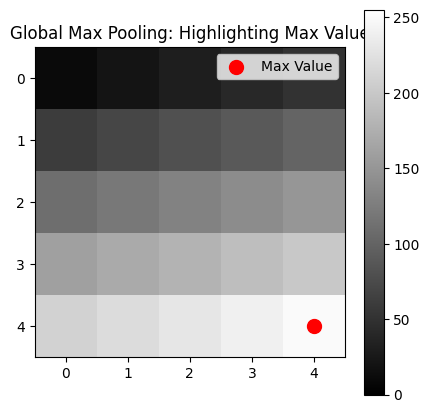

Original Image:
 [[ 10  20  30  40  50]
 [ 60  70  80  90 100]
 [110 120 130 140 150]
 [160 170 180 190 200]
 [210 220 230 240 250]]
Global Max Pooled Value: 250


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def global_max_pooling(img):
    """Apply Global Max Pooling to a grayscale image."""
    return np.max(img)

# Create a simple 5x5 matrix as an image
img = np.array([[10,  20,  30,  40,  50],
                [60,  70,  80,  90, 100],
                [110, 120, 130, 140, 150],
                [160, 170, 180, 190, 200],
                [210, 220, 230, 240, 250]], dtype=np.uint8)

# Find global max value
global_max_value = global_max_pooling(img)

# Find the location of the max value
max_pos = np.where(img == global_max_value)  # Returns (row indices, col indices)

# Plot the original image
plt.figure(figsize=(5, 5))
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.colorbar()
plt.title("Global Max Pooling: Highlighting Max Value")

# Highlight the max value with a red marker
for i in range(len(max_pos[0])):  # In case of multiple max values
    plt.scatter(max_pos[1][i], max_pos[0][i], color='red', s=100, label="Max Value" if i == 0 else "")

plt.legend()
plt.show()

# Print results
print("Original Image:\n", img)
print("Global Max Pooled Value:", global_max_value)


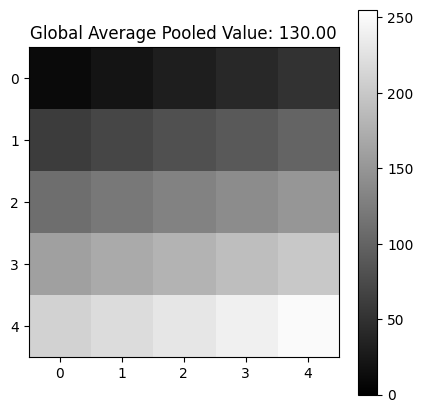

Original Image:
 [[ 10  20  30  40  50]
 [ 60  70  80  90 100]
 [110 120 130 140 150]
 [160 170 180 190 200]
 [210 220 230 240 250]]
Global Average Pooled Value: 130.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def global_average_pooling(img):
    """Apply Global Average Pooling to a grayscale image."""
    return np.mean(img)

# Create a simple 5x5 matrix as an image
img = np.array([[10,  20,  30,  40,  50],
                [60,  70,  80,  90, 100],
                [110, 120, 130, 140, 150],
                [160, 170, 180, 190, 200],
                [210, 220, 230, 240, 250]], dtype=np.uint8)

# Compute global average pooling value
global_avg_value = global_average_pooling(img)

# Plot the original image
plt.figure(figsize=(5, 5))
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.colorbar()
plt.title(f"Global Average Pooled Value: {global_avg_value:.2f}")

# Show the plot
plt.show()

# Print results
print("Original Image:\n", img)
print("Global Average Pooled Value:", global_avg_value)


# What if I applied stride PROPERLY?




In [ ]:
import numpy as np

def max_pooling_strided(img, pool_size=(2, 2), stride=(2, 2)):
    H, W = img.shape
    ph, pw = pool_size
    sh, sw = stride

    # Last valid top‑left corner for the pooling window
    last_i = H - ph
    last_j = W - pw

    # Compute all start indices with the chosen stride
    row_idxs = list(range(0, last_i + 1, sh))
    col_idxs = list(range(0, last_j + 1, sw))

    pooled = np.empty((len(row_idxs), len(col_idxs)), dtype=img.dtype)

    for out_i, i in enumerate(row_idxs):
        for out_j, j in enumerate(col_idxs):
            window = img[i : i + ph, j : j + pw]
            pooled[out_i, out_j] = np.max(window)

    return pooled

img = np.array([[ 10,  20,  30,  40,  50],
                [ 60,  70,  80,  90, 100],
                [110, 120, 130, 140, 150],
                [160, 170, 180, 190, 200],
                [210, 220, 230, 240, 250]], dtype=np.uint8)

pooled_img = max_pooling_strided(img, pool_size=(2, 2), stride=(2, 2))
print(pooled_img)



[[ 70  90]
 [170 190]]
